In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import linear_model 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import scale, StandardScaler, OneHotEncoder
import sklearn

In [5]:
df = pd.read_csv("data_4.csv")
df.head(5)

,esg_score21,esg_class21,environ_score21,environ_class21,social_score21,social_class21,govern_score21,govern_class21,turnover21,firm_age,...,sectors_Metals & Metal Products,"sectors_Public Administration, Education, Health Social Services",sectors_Retail,sectors_Transport Manufacturing,sectors_Utilities,audit_status21_Audit n.a.,audit_status21_Missing,audit_status21_No auditado,audit_status21_Salvedades,audit_status21_Sin opinión
0,-0.569247,-0.345854,-1.721908,-0.231856,-1.041523,-0.34062,0.656902,0.766337,1.061682,-1.131157,...,-0.306401,-0.029774,-0.326808,-0.241562,-0.212202,-0.288945,-1.366672,-0.022077,-0.156524,-0.016303
1,0.534502,-0.345854,0.446051,-0.231856,-0.150737,-0.34062,1.204951,0.766337,1.361008,0.050243,...,-0.306401,-0.029774,3.059904,-0.241562,-0.212202,-0.288945,-1.366672,-0.022077,-0.156524,-0.016303
2,1.454293,2.325055,0.686935,-0.231856,1.096364,-0.34062,2.301049,0.766337,-0.059054,-0.377435,...,-0.306401,-0.029774,3.059904,-0.241562,-0.212202,-0.288945,-1.366672,-0.022077,-0.156524,-0.016303
3,0.166586,-0.345854,-0.637929,-0.231856,-0.328894,-0.34062,0.930926,0.766337,-0.582949,-2.063840,...,-0.306401,-0.029774,-0.326808,-0.241562,-0.212202,-0.288945,-1.366672,-0.022077,-0.156524,-0.016303
4,0.166586,-0.345854,0.084724,-0.231856,-0.685208,-0.34062,1.067939,0.766337,-2.161638,1.340643,...,-0.306401,-0.029774,-0.326808,-0.241562,-0.212202,-0.288945,0.731704,-0.022077,-0.156524,-0.016303


Entrenando el modelo...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Mejores parámetros: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Mejor puntuación en validación: 0.9636
Error cuadrático medio (MSE): 0.0339
R^2 en test: 0.9658


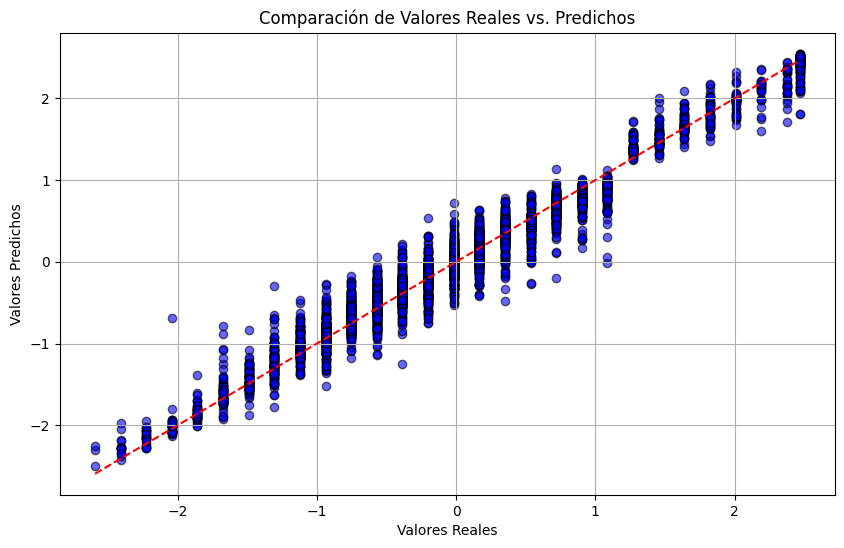

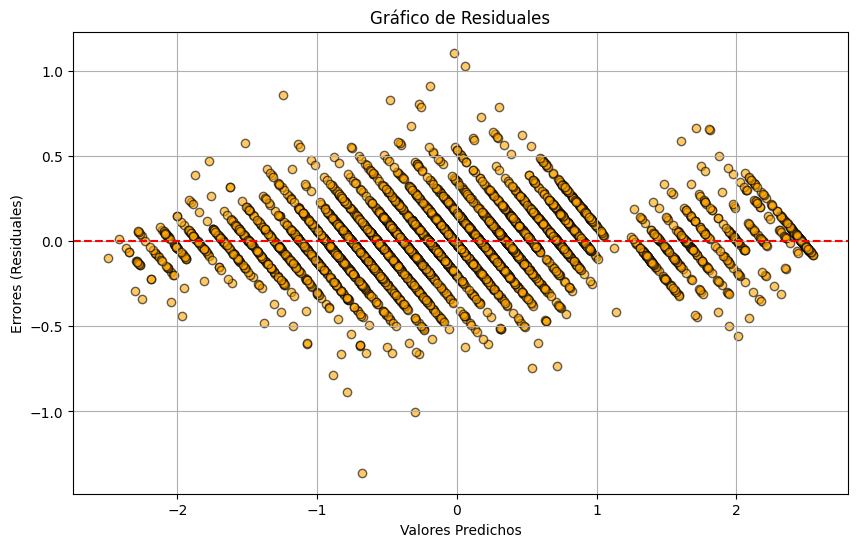

In [8]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar tu DataFrame (asegúrate de que 'df' esté definido)
# df = pd.read_csv("tu_archivo.csv")

# Separar X (variables independientes) e y (variable objetivo)
X = df.drop(columns=['esg_score21'])
y = df['esg_score21']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo base de XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Definir la cuadrícula de hiperparámetros para el GridSearch
param_grid = {'n_estimators': [50, 100],
              'max_depth': [3, 5],
              'learning_rate': [0.1, 0.01],
              'subsample': [0.8, 1.0],
              'colsample_bytree': [0.8, 1.0]}

# Configurar el GridSearch
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=3, scoring='r2', verbose=2, n_jobs=-1)

# Entrenar el modelo con GridSearch
print("Entrenando el modelo...")
grid_search.fit(X_train, y_train)

# Resultados del GridSearch
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor puntuación en validación: {grid_search.best_score_:.4f}")

# Evaluar el modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calcular métricas de desempeño
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.4f}")
print(f"R^2 en test: {r2:.4f}")

# Gráfico 1: Comparación entre valores reales y predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b', edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Comparación de Valores Reales vs. Predichos")
plt.grid(True)
plt.show()

# Gráfico 2: Gráfico de Residuales
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='orange', edgecolor='k')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Valores Predichos")
plt.ylabel("Errores (Residuales)")
plt.title("Gráfico de Residuales")
plt.grid(True)
plt.show()

Resultados del Modelo XGBoost
Los resultados muestran que tu modelo ha obtenido un excelente desempeño en la predicción de esg_score21:

Hiperparámetros óptimos (seleccionados mediante GridSearch):

colsample_bytree: 0.8
learning_rate: 0.1
max_depth: 5
n_estimators: 100
subsample: 0.8

Métricas del modelo:

Mejor puntuación en validación (R²): 0.9637
Indica que el modelo ajusta muy bien los datos en el conjunto de entrenamiento mediante validación cruzada.
Error cuadrático medio (MSE) en test: 0.0337
El error es muy bajo, lo que significa que las predicciones son precisas.
R² en test: 0.9660
El R² cercano a 1 confirma que el modelo explica un 96.6% de la variabilidad en los datos de prueba, validando su solidez en datos no vistos.

Conclusión
Este modelo XGBoost:

Generaliza bien en datos nuevos (test), mostrando una excelente capacidad predictiva.
Ofrece un bajo error y alto poder explicativo (R²), lo cual es clave para tareas analíticas y estratégicas relacionadas con la evaluación de ESG.
Es robusto y eficiente gracias a los hiperparámetros óptimos encontrados con GridSearchCV.


Analisis del desempeño de mi modelo

La mayoría de los puntos (valores predichos) se encuentran cercanos a la línea roja 𝑦=𝑥, lo que indica que las predicciones están bastante alineadas con los valores reales.
Esto refuerza el alto valor de 𝑅2 en test: 0.9660, confirmando que el modelo predice muy bien la variabilidad de los datos.

Dispersión de los Datos:
Hay pequeñas desviaciones de la línea ideal, especialmente en valores intermedios, pero en general la dispersión es baja.
No se observan patrones evidentes de subestimación o sobreestimación en los extremos, lo cual es una buena señal.
MSE Bajo:
El Error Cuadrático Medio (MSE) de 0.0337 es extremadamente bajo, indicando que los errores de predicción son mínimos.
